# Timing Experiment

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import warnings
import detect_simpsons_paradox as dsp
import data_util as sp_dat
import random
import time
import math
from random import gauss

Add extra parameter to method mixed_regression_sp for controling the number of extra attributes for continuous attributes and categorical attributes

In [2]:
def mixed_regression_sp(N, mu,cov,p,extra):
    
    k = len(mu)
    
    # sample from clusters
    z = np.random.randint(0,k,N)
    x = np.asarray([np.random.multivariate_normal(mu[z_i],cov) for z_i in z])

    # make a dataframe
    latent_df = pd.DataFrame(data=x,
                           columns = ['x1', 'x2'])
    
    # add extra continuous column
    for i in range(extra):
        attrName = "con_" + str(i)
        y = pd.DataFrame(data=np.random.normal(0, 100, N),columns=[attrName])
        latent_df = pd.concat([latent_df, y], axis=1)
        
    # code z as color and add that as a column to the dataframe
    color_z = {0:'r', 1:'b', 2:'g'}
    
    latent_df['color'] = [z_i for z_i in z]
    
    
    # add extra categorical column
    for i in range(extra):
        attrName = "cat_" + str(i)
        y = pd.DataFrame(data=np.random.choice(100,N),columns=[attrName])
        latent_df = pd.concat([latent_df, y], axis=1)
   
    return latent_df

In [3]:
from random import randint
def random_with_N_digits(n):
    range_start = 10**(n-1)
    range_end = (10**n)-1
    return randint(range_start, range_end)

Running time--- 10.786897897720337 seconds ---


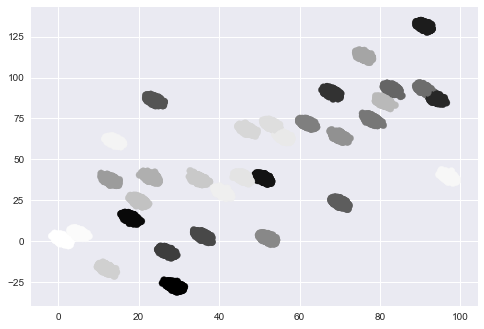

In [4]:
start_time = time.time()
N = int(math.pow(10,5))

mu = np.asarray([[1,1],[5,5]])

for i in range(30):
    mu_x = random_with_N_digits(2);
    variance = 1000
    mu_y = gauss(mu_x, math.sqrt(variance))
    mu_new = np.asarray([mu_x,mu_y])   
    mu = np.append(mu,[mu_new],axis=0)  

cov = [[.6,-1],[0,.6]]
latent_df = mixed_regression_sp(N,mu,cov,[.7,.3],5)
print("Running time--- %s seconds ---" % (time.time() - start_time))

plt.scatter(latent_df['x1'], latent_df['x2'],
            c =  latent_df['color'], marker= 'o')
plt.show()

Time experiment for the whole dataset and the sampled dataset

In [5]:
start_time = time.time()
test = dsp.detect_simpsons_paradox(latent_df)
print("--- %s seconds ---" % (time.time() - start_time))

#################
rows1 = random.sample(list(latent_df.index), int(len(latent_df)*0.1))
latent_df1 = latent_df.loc[rows1]

start_time = time.time()
test1 = dsp.detect_simpsons_paradox(latent_df1)
print("10 Percent--- %s seconds ---" % (time.time() - start_time))

################
rows3 = random.sample(list(latent_df.index), int(len(latent_df)*0.3))
latent_df3 = latent_df.loc[rows3]

start_time = time.time()
test3 = dsp.detect_simpsons_paradox(latent_df3)
print("30 Percent--- %s seconds ---" % (time.time() - start_time))

################
rows5 = random.sample(list(latent_df.index), int(len(latent_df)*0.5))
latent_df5 = latent_df.loc[rows5]

start_time = time.time()
test5 = dsp.detect_simpsons_paradox(latent_df5)
print("50 Percent--- %s seconds ---" % (time.time() - start_time))

#################
rows6 = random.sample(list(latent_df.index), int(len(latent_df)*0.6))
latent_df6 = latent_df.loc[rows6]

start_time = time.time()
test6 = dsp.detect_simpsons_paradox(latent_df6)
print("60 Percent--- %s seconds ---" % (time.time() - start_time))

##################
rows9 = random.sample(list(latent_df.index), int(len(latent_df)*0.9))
latent_df9 = latent_df.loc[rows9]

start_time = time.time()
test9 = dsp.detect_simpsons_paradox(latent_df9)
print("90 Percent--- %s seconds ---" % (time.time() - start_time))

--- 3.5197598934173584 seconds ---
10 Percent--- 3.4184410572052 seconds ---
30 Percent--- 4.160675048828125 seconds ---
50 Percent--- 4.071406841278076 seconds ---
60 Percent--- 3.9785349369049072 seconds ---
90 Percent--- 3.877843141555786 seconds ---
